<h2>1. Exploration et Analyse des Données (EAD)</h2>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3468 non-null   int64  
 1   tweet                3467 non-null   object 
 2   sarcastic            3468 non-null   int64  
 3   rephrase             867 non-null    object 
 4   sarcasm              867 non-null    float64
 5   irony                867 non-null    float64
 6   satire               867 non-null    float64
 7   understatement       867 non-null    float64
 8   overstatement        867 non-null    float64
 9   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 271.1+ KB


None

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


,Unnamed: 0,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
count,3468.000000,3468.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,1733.500000,0.250000,0.822376,0.178777,0.028835,0.011534,0.046136,0.116494
std,1001.269694,0.433075,0.382417,0.383387,0.167439,0.106837,0.209901,0.321001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,866.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1733.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2600.250000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3467.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


sarcastic
0    2601
1     867
Name: count, dtype: int64

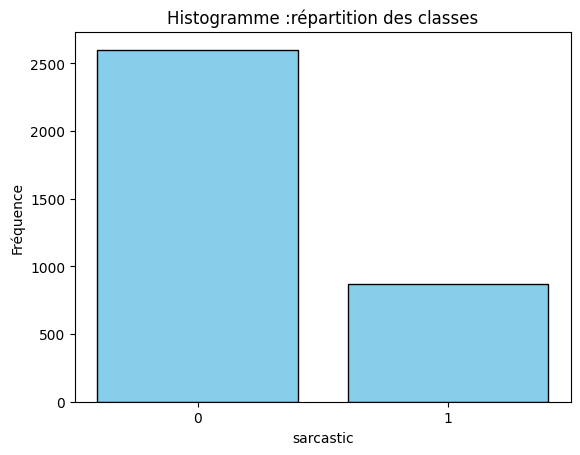

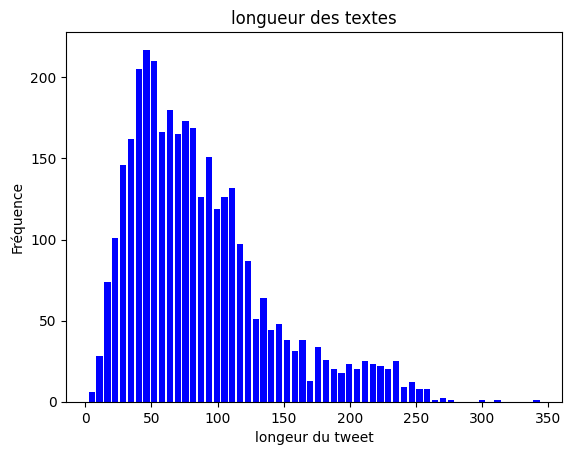

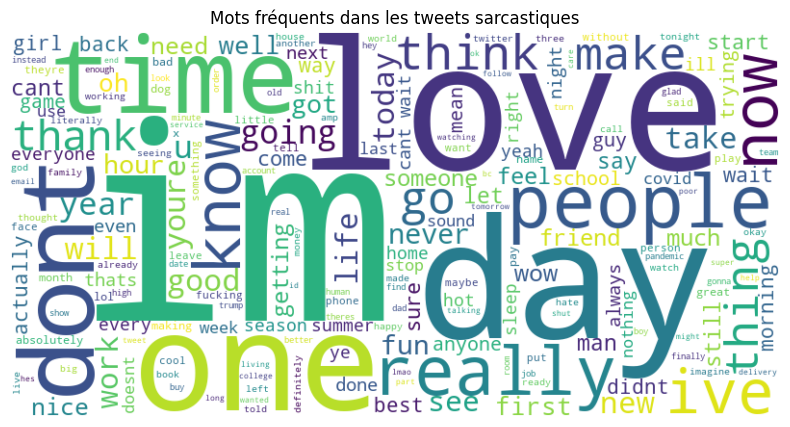

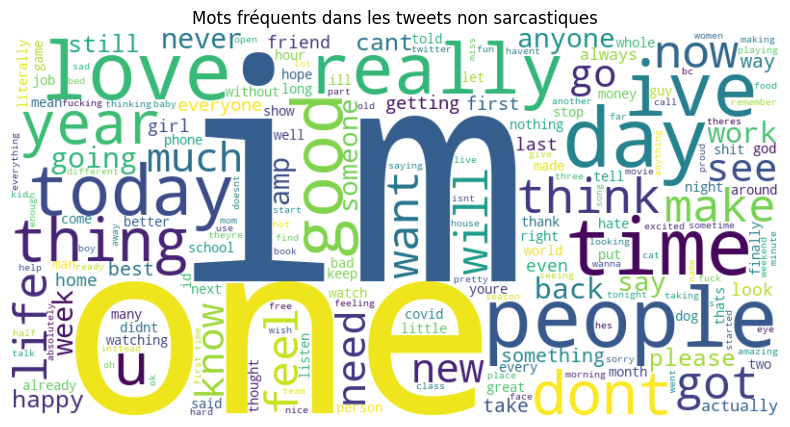

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from wordcloud import WordCloud


df = pd.read_csv("train.En.csv") #chargement du fichier : train.En.csv
#analys
display(df.info())
display(df.head())
display(df.describe())

#verification du distribution des classes
display(df["sarcastic"].value_counts())



#Mesure la longueur des textes 
df["num_words"] = df["tweet"].str.split().str.len()
df["len_tweet"] = df["tweet"].str.replace(" ","").str.len()

#visualisation des donnéés

plt.hist(df["sarcastic"], bins=[-0.5, 0.5, 1.5], color='skyblue', edgecolor='black', rwidth=0.8)
plt.xticks([0,1])  # pour afficher seulement 0 et 1 sur l'axe x
plt.title("Histogramme :répartition des classes")
plt.xlabel("sarcastic")
plt.ylabel("Fréquence")
plt.show()

plt.hist(df["len_tweet"], bins=int(np.sqrt(len(df["len_tweet"]))), color='blue', rwidth=0.8 )
plt.title("longueur des textes")
plt.xlabel("longeur du tweet")
plt.ylabel("Fréquence")
plt.show()




def clean_tweet(text):
    text = text.lower()                                  # mettre tout le texte en minuscules
    text = re.sub(r'http\S+|www\S+', '', text)           # supprimer les liens (URLs)
    text = re.sub(r'@\w+', '', text)                     # supprimer les mentions (@utilisateur)
    text = re.sub(r'#', '', text)                        # supprimer le symbole # mais garder le mot
    text = re.sub(r'[^a-z\s]', '', text)                 # supprimer la ponctuation, les chiffres et les emojis
    text = re.sub(r'\s+', ' ', text).strip()             # supprimer les espaces multiples et les espaces en trop
    return text


text_sarcastic = " ".join(df[df["sarcastic"] == 1]["tweet"].astype(str).tolist()) #mettre tout les tweets sarcastic dans la meme str
cleaned_tweet_sarcastic = clean_tweet(text_sarcastic)#nettoyage et transformation du text 

text_non_sarcastic = " ".join(df[df["sarcastic"] == 0]["tweet"].astype(str).tolist()) #mettre tout les tweets sarcastic dans la meme str
cleaned_tweet_non_sarcastic = clean_tweet(text_non_sarcastic)#nettoyage et transformation du text 

wordcloud_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(cleaned_tweet_sarcastic)
wordcloud_non_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(cleaned_tweet_non_sarcastic)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.axis('off')  
plt.title("Mots fréquents dans les tweets sarcastiques")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.axis('off')  
plt.title("Mots fréquents dans les tweets non sarcastiques")

plt.show()



<h3>2. Prétraitement du texte </h3>

In [40]:
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialisation
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer(preserve_case=True, strip_handles=True, reduce_len=False)

# Convert POS NLTK → WordNet
def nltk_pos_to_wordnet(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return wordnet.NOUN

# Prétraitement pour sarcasme
def preprocess_sarcasm_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+", " ", text)            # URLs
    text = emoji.demojize(text, delimiters=(" ", " "))      # Emojis → texte
    text = re.sub(r"@\w+", " ", text)                      # Mentions
    text = re.sub(r"#", " ", text)                         # Hashtags
    text = re.sub(r"[^a-zA-Z0-9!?.:;'\" ]+", " ", text)   # Lettres, chiffres, ponctuation
    text = re.sub(r'\s+', ' ', text).strip()              # Espaces multiples
    
    tokens = tokenizer.tokenize(text)                      # Tokenisation
    important = {"not", "never", "oh", "yeah", "sure", "really", "wow"}
    filtered_tokens = [w for w in tokens if (w not in stop_words or w in important)]
    
    pos_tags = nltk.pos_tag(filtered_tokens)               # POS tagging
    lemmas = [lemmatizer.lemmatize(w, nltk_pos_to_wordnet(pos)) for w, pos in pos_tags]
    
    return " ".join(lemmas)

# Application
df["clean_text"] = df["tweet"].apply(preprocess_sarcasm_text)
df[['tweet', 'clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guesm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\guesm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\guesm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,tweet,clean_text
0,The only thing I got from college is a caffein...,The thing I get college caffeine addiction
1,I love it when professors draw a big question ...,I love professor draw big question mark next a...
2,Remember the hundred emails from companies whe...,Remember hundred emails company Covid start ge...
3,Today my pop-pop told me I was not “forced” to...,Today pop pop tell I not force go college upsi...
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,I I also report Cancun Cruz not worry heartbea...


<h3>3. Vectorisation (transformation en nombres) </h3>

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack,csr_matrix

#vectorizer les textes netoyer avec TfidfVectorizer

tf_id = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
vecorized_text = tf_id.fit_transform(df["clean_text"].fillna(''))

#concatiner les features numerique
numeric_features = df[["num_words", "len_tweet"]].fillna(0).values

X = hstack([vecorized_text, csr_matrix(numeric_features)] )
y = df["sarcastic"].values







<h3>4. Application d’au moins 5 algorithmes de Machine Learning </h3>

In [42]:
from sklearn.model_selection import train_test_split#Division des données en train/test (80% / 20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y) 



In [43]:

from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


def training(X_train, X_test, y_train, y_test, model ) :
   
    model.fit(X_train,y_train)

    y_predict = model.predict(X_test) #donner les prediction du model de x_test
    cm = confusion_matrix(y_test, y_predict)#matrice de confusion
    ConfusionMatrixDisplay(cm, display_labels=['non sarcastic','sarcastic ']).plot()
    plt.title("Matrice de confusion  ")
    plt.show()
    #calcul des metrics
    accuracy = accuracy_score(y_test, y_predict) #accuracy
    f1 = f1_score(y_test, y_predict) #f1 score
    precision = precision_score(y_test, y_predict ) #precision
    recall = recall_score(y_test, y_predict) #recall
    auc = roc_auc_score(y_test, y_predict)

    print(
        f"accuracy = {accuracy} \n" +
        f"f1 = {f1} \n" +
        f"precision = {precision} \n" + 
        f"recall = {recall} \n"+
        f"auc = {auc}"
    )

    return {"accuracy" : accuracy, "f1" : f1, "precision" : precision, "recall" : recall, "auc" : auc}

<h4>1-Rigression loguistique</h4>

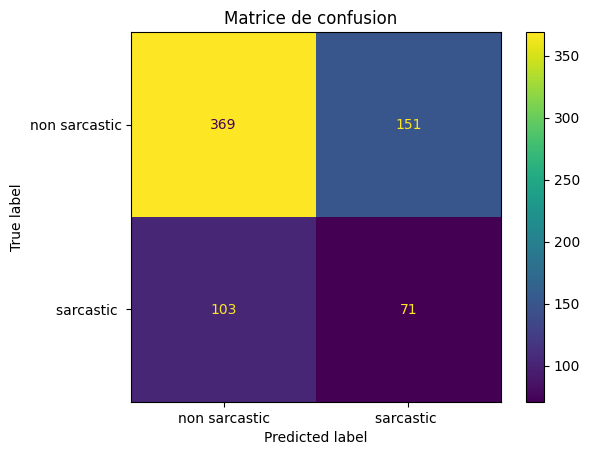

accuracy = 0.6340057636887608 
f1 = 0.35858585858585856 
precision = 0.31981981981981983 
recall = 0.40804597701149425 
auc = 0.5588306808134395


In [44]:

weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i : w for i, w in enumerate(weights)}
log = LogisticRegression (max_iter=1000, class_weight=class_weights,random_state=42) 

eval_regression_logistique = training(X_train, X_test, y_train, y_test, log)

scores = {"regression_logistique" : eval_regression_logistique}





<h4>2-KNN</h4>

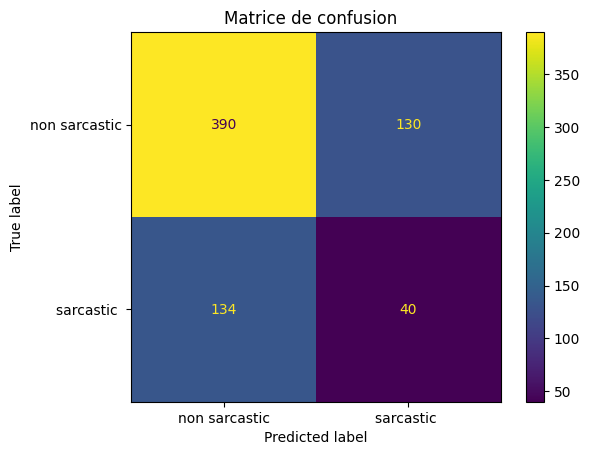

accuracy = 0.6195965417867435 
f1 = 0.23255813953488372 
precision = 0.23529411764705882 
recall = 0.22988505747126436 
auc = 0.48994252873563215


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



knn = KNeighborsClassifier()
g = {
    "n_neighbors" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "weights" : ["distance"],
    "metric" : ["euclidean"]
}
grid = GridSearchCV(knn, g,cv=5,scoring='f1') #optimiser f1 car les classes ne sont pas equilibre
grid.fit(X_train,y_train)

eval_knn = training(X_train, X_test, y_train, y_test, grid.best_estimator_)

scores["knn"] = eval_knn
    


<h3>3-SVM</h3>

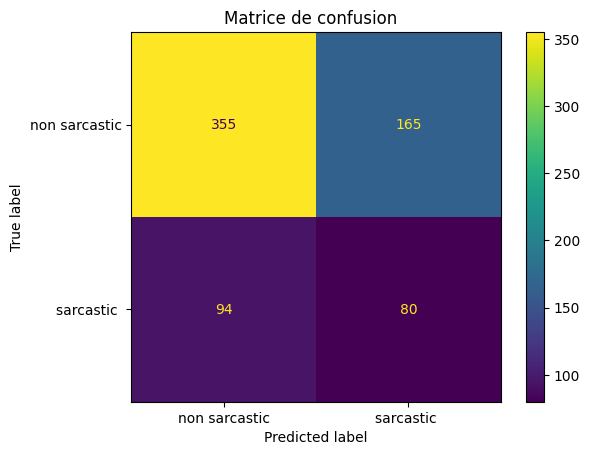

accuracy = 0.6268011527377522 
f1 = 0.3818615751789976 
precision = 0.32653061224489793 
recall = 0.45977011494252873 
auc = 0.5712312113174182


In [47]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',class_weight='balanced')

param_grid = {
    'gamma': ['scale', 'auto']
}

g = GridSearchCV(svm, param_grid, cv=3, scoring='f1', n_jobs=-1)
g.fit(X_train, y_train)

eval_svm = training(X_train, X_test, y_train, y_test, g.best_estimator_)
scores["svm"] = eval_svm


<h3>4-Naive Bayes</h3>

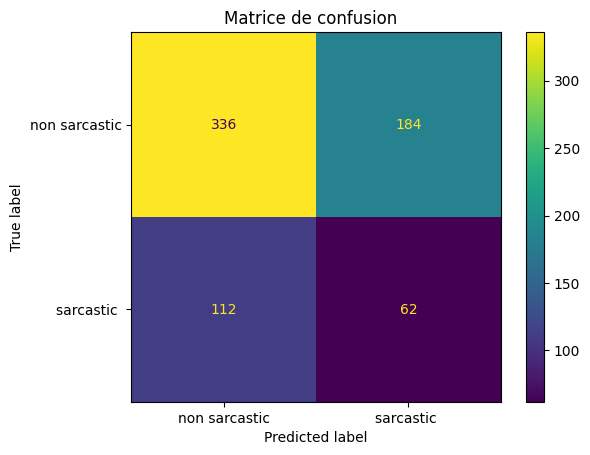

accuracy = 0.5734870317002881 
f1 = 0.29523809523809524 
precision = 0.25203252032520324 
recall = 0.3563218390804598 
auc = 0.5012378426171529


In [54]:
from sklearn.naive_bayes import GaussianNB

mnb = GaussianNB()

eval_nb = training(X_train.toarray(), X_test.toarray(), y_train, y_test, mnb)

scores["Naive_bais"] = eval_nb


<h3>5-Random forest</h3>

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\guesm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
474 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guesm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\guesm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c

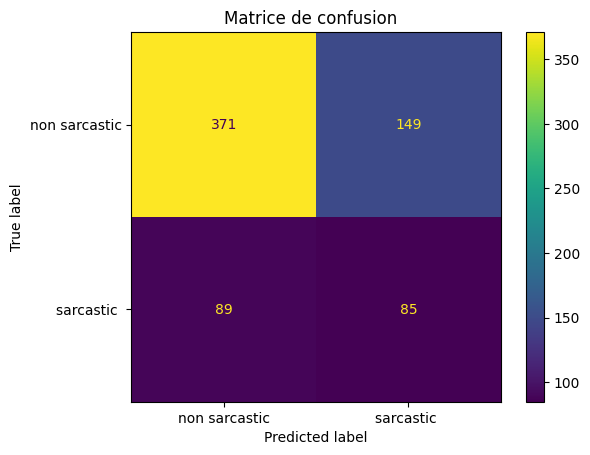

accuracy = 0.6570605187319885 
f1 = 0.4166666666666667 
precision = 0.36324786324786323 
recall = 0.4885057471264368 
auc = 0.6009836427939876


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid = {
    'n_estimators': [50, 100, 200],     
    'max_depth': [None, 5, 10, 20],     
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt'] 
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                 
    n_jobs=-1,             
    verbose=2,
    scoring='f1'     
)

grid_search.fit(X_train, y_train)

mod = grid_search.best_estimator_

eval_rf = training(X_train, X_test, y_train, y_test, mod)

scores["Random_forest"] = eval_rf

In [50]:
sc = pd.DataFrame.from_dict(scores, orient='index')

display(sc)

,accuracy,f1,precision,recall,auc
regression_logistique,0.634006,0.358586,0.319820,0.408046,0.558831
knn,0.619597,0.232558,0.235294,0.229885,0.489943
svm,0.626801,0.381862,0.326531,0.459770,0.571231
Naive_bais,0.743516,0.011111,0.166667,0.005747,0.498066
Random_forest,0.657061,0.416667,0.363248,0.488506,0.600984


In [55]:
import joblib

test = pd.read_csv("task_A_En_test.csv")

test["clean_text"] = test["text"].apply(preprocess_sarcasm_text)
test["num_words"] = test["text"].str.split().str.len()
test["len_tweet"] = test["text"].str.replace(" ","").str.len()

x_t_vec = tf_id.transform(test["clean_text"])
numeric_features = test[["num_words", "len_tweet"]].fillna(0).values

x_t = hstack([x_t_vec, csr_matrix(numeric_features)] )
y_t = test["sarcastic"].values


joblib.dump(mod, "random_forest_model.pkl")

y_pred = mod.predict(x_t)
predictions = pd.DataFrame({"text": range(len(y_pred)),"Prediction": y_pred})

predictions.to_csv("y_test_predit.csv", index=False)


